In [1]:
import pandas as pd
from unidecode import unidecode
import unicodedata

In [2]:
df = pd.read_csv('data/tracks.csv', parse_dates=['release_date'])

In [3]:
# Tratando a string como lista e pegando o primeiro artista principal
from ast import literal_eval
df['artist'] = df['artists'].apply(lambda x: literal_eval(x)[0])

In [4]:
# Remove dados fantasma
df = df[df['name'].notna()]

In [5]:
entries = pd.read_csv('data/billboard_hot_100_definitive.csv', parse_dates=['date'])

In [6]:
entries.head(5)

,name,artist,rank,weeks,date
0,All I Want For Christmas Is You,Mariah Carey,1,50,2022-01-01
1,Rockin' Around The Christmas Tree,Brenda Lee,2,44,2022-01-01
2,Jingle Bell Rock,Bobby Helms,3,41,2022-01-01
3,A Holly Jolly Christmas,Burl Ives,4,25,2022-01-01
4,Easy On Me,Adele,5,11,2022-01-01


In [7]:
def is_latin(s):
    for c in s:
        if c.isascii():  # checks for numbers, English letters, spaces, and punctuation
            continue
        try:
            if 'LATIN' not in unicodedata.name(c):
                return False
        except ValueError:
            return False
    return True

In [8]:
# Remove dados com música não em alfabeto latino
df = df[df['name'].apply(is_latin)]


In [9]:
# Remove acentos e caracteres especiais
df['name'] = df['name'].apply(unidecode)
df['artist'] = df['artist'].apply(unidecode)

<Axes: >

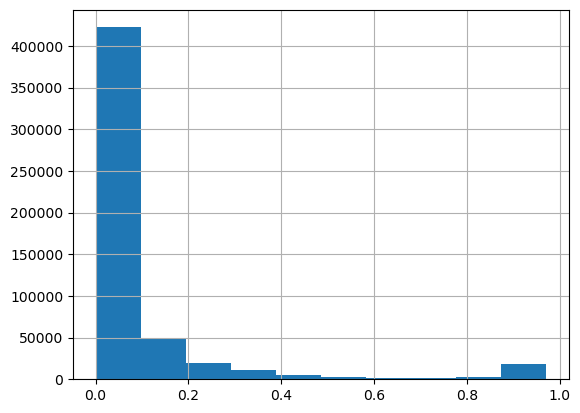

In [10]:
df['speechiness'].hist()

<Axes: >

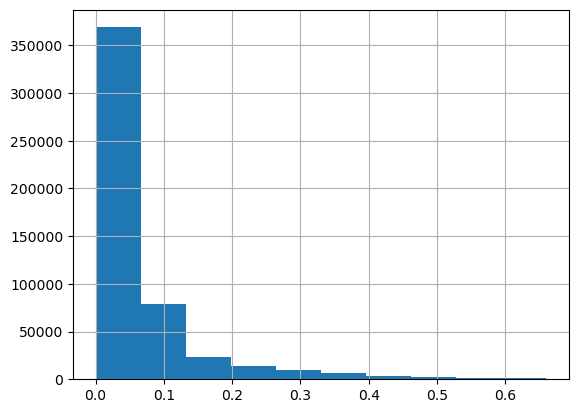

In [11]:
df = df[df['speechiness'] <= 0.66]
df['speechiness'].hist()

In [12]:
billboard = entries.sort_values('date', ascending=False)
billboard['cumulative_artist_appearances'] = billboard.groupby('artist').cumcount(ascending=False)
billboard = billboard.sort_values(by=['date'], ascending=False).drop_duplicates(['name', 'artist'], keep='last')
billboard.loc[billboard['artist'] == 'Big Time Rush']

,name,artist,rank,weeks,date,cumulative_artist_appearances
49496,Windows Down,Big Time Rush,97,1,2012-07-14,13
56478,Boyfriend,Big Time Rush,79,1,2011-03-12,2
57278,Big Night,Big Time Rush,79,1,2011-01-15,1
60792,Halfway There,Big Time Rush,93,1,2010-05-15,0


In [13]:
# Por alguma razão, algumas músicas aparecem repetidas diversas vezes com 
# variações mínimas nas features de audio, portanto é necessario filtra-las
new_df = df.sort_values(by='release_date').drop_duplicates(['name', 'artist'], keep='first')
new_df.loc[(df['artist'] == 'Big Time Rush')][['name', 'artist', 'release_date']]

,name,artist,release_date
84002,Any Kind of Guy,Big Time Rush,2010-02-02
156379,Big Time Rush,Big Time Rush,2010-04-09
397551,Halfway There,Big Time Rush,2010-04-27
397586,Famous,Big Time Rush,2010-06-29
397592,City Is Ours,Big Time Rush,2010-08-03
468010,Count On You (feat. Jordin Sparks),Big Time Rush,2010-10-11
119209,Til I Forget About You,Big Time Rush,2010-10-11
119203,Boyfriend,Big Time Rush,2010-10-11
119206,Worldwide,Big Time Rush,2010-10-11
468101,If I Ruled the World (feat. Iyaz),Big Time Rush,2011-01-01


In [14]:
new_df

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist
478627,74CSJTE5QQp1e4bHzm3wti,Maldita sea la primera vez,19,233920,0,['Los Pincheira del Sur'],['1BnQrx8p0bHBpidjIGq26z'],1900-01-01,0.659,0.791,...,-4.895,1,0.0295,0.13900,0.000002,0.161,0.956,141.999,4,Los Pincheira del Sur
132326,1Jl19I7NAHgnvrlg6HIzK9,Help me,0,177367,0,"['Abe Lyman’s Orchestra', 'Abe Lyman']","['6LxnbCQ3ZrKj1lvC1lylS5', '3cNzWID6yZ1HN8qj4g...",1922-01-01,0.358,0.456,...,-4.728,1,0.0380,0.57500,0.000003,0.340,0.317,120.169,4,Abe Lyman's Orchestra
132354,3IshNqd3sMjHvtj97sUtyB,Hullabaloo,0,167963,0,"['Abe Lyman’s Orchestra', 'Abe Lyman']","['6LxnbCQ3ZrKj1lvC1lylS5', '3cNzWID6yZ1HN8qj4g...",1922-01-01,0.842,0.720,...,-6.756,1,0.0817,0.96100,0.242000,0.265,0.842,119.110,4,Abe Lyman's Orchestra
132355,3KfDZww1OqQK8yUiYpSkyX,Jeannine,0,176218,0,"['Abe Lyman’s Orchestra', 'Abe Lyman']","['6LxnbCQ3ZrKj1lvC1lylS5', '3cNzWID6yZ1HN8qj4g...",1922-01-01,0.146,0.635,...,-7.811,0,0.0458,0.99000,0.797000,0.524,0.443,83.640,4,Abe Lyman's Orchestra
132356,3MgGOqoHw1N0TQaL8gAoI3,On the Alamo,0,207177,0,"['Isham Jones & His Orchestra', 'Isham Jones']","['65A1WinXDUhVkZD98s8kKU', '4OWTlYl5kkhaZEsyjU...",1922-01-01,0.280,0.482,...,-5.019,1,0.0351,0.99500,0.770000,0.234,0.520,175.163,4,Isham Jones & His Orchestra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188863,1NCLXNEEpUtSV8eS7me71G,Tu Verdad,0,205120,0,['J Balvin'],['1vyhD5VmyZ7KMfW5gqLgo5'],2021-04-16,0.777,0.642,...,-6.657,0,0.0566,0.17600,0.000015,0.178,0.589,115.930,4,J Balvin
94264,43H6Jrn6CIa7xnfKL79vE6,This Time Around,0,162820,0,['Wiz Khalifa'],['137W8MRPWKqSmrBGDBFSop'],2021-04-16,0.775,0.656,...,-4.724,0,0.0732,0.09990,0.000001,0.142,0.755,157.010,4,Wiz Khalifa
188822,54TI5Pf1OG2sEEPebJVr88,Catching Feelings,0,234680,0,['Justin Bieber'],['1uNFoZAHBGtllmzznpCI3s'],2021-04-16,0.325,0.541,...,-6.665,1,0.0414,0.35300,0.000000,0.350,0.363,85.169,4,Justin Bieber
94240,7uHMx3E8in607GoKRv1Kcx,Spicy,0,143375,0,"['Ty Dolla $ign', 'Post Malone']","['7c0XG5cIJTrrAgEC3ULPiq', '246dkjvS1zLTtiykXe...",2021-04-16,0.782,0.510,...,-5.724,0,0.0419,0.14300,0.000000,0.115,0.118,99.993,4,Ty Dolla $ign


## Construção da feature de aparições prévias de um artista no lançamento da música

In [15]:
# merged_df = pd.merge(df, sanitized_entries, how='left', on=['name', 'artist']).drop(columns=['id', 'artists', 'id_artists', 'popularity','time_signature']).drop_duplicates(['name', 'artist'], keep='first').reset_index(drop=True)
merged_df = pd.merge(new_df, billboard, how='left', on=['name', 'artist']).drop(columns=['id', 'artists', 'id_artists', 'popularity']).reset_index(drop=True)
merged_df

,name,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,time_signature,artist,rank,weeks,date,cumulative_artist_appearances
0,Maldita sea la primera vez,233920,0,1900-01-01,0.659,0.791,2,-4.895,1,0.0295,...,0.000002,0.161,0.956,141.999,4,Los Pincheira del Sur,NaN,NaN,NaT,NaN
1,Help me,177367,0,1922-01-01,0.358,0.456,3,-4.728,1,0.0380,...,0.000003,0.340,0.317,120.169,4,Abe Lyman's Orchestra,NaN,NaN,NaT,NaN
2,Hullabaloo,167963,0,1922-01-01,0.842,0.720,3,-6.756,1,0.0817,...,0.242000,0.265,0.842,119.110,4,Abe Lyman's Orchestra,NaN,NaN,NaT,NaN
3,Jeannine,176218,0,1922-01-01,0.146,0.635,8,-7.811,0,0.0458,...,0.797000,0.524,0.443,83.640,4,Abe Lyman's Orchestra,NaN,NaN,NaT,NaN
4,On the Alamo,207177,0,1922-01-01,0.280,0.482,9,-5.019,1,0.0351,...,0.770000,0.234,0.520,175.163,4,Isham Jones & His Orchestra,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451305,Tu Verdad,205120,0,2021-04-16,0.777,0.642,11,-6.657,0,0.0566,...,0.000015,0.178,0.589,115.930,4,J Balvin,NaN,NaN,NaT,NaN
451306,This Time Around,162820,0,2021-04-16,0.775,0.656,6,-4.724,0,0.0732,...,0.000001,0.142,0.755,157.010,4,Wiz Khalifa,NaN,NaN,NaT,NaN
451307,Catching Feelings,234680,0,2021-04-16,0.325,0.541,3,-6.665,1,0.0414,...,0.000000,0.350,0.363,85.169,4,Justin Bieber,NaN,NaN,NaT,NaN
451308,Spicy,143375,0,2021-04-16,0.782,0.510,4,-5.724,0,0.0419,...,0.000000,0.115,0.118,99.993,4,Ty Dolla $ign,53.0,1.0,2020-11-07,68.0


In [16]:
# Pega todas as entradas que não são nulas
billboard_entries_df = merged_df[~merged_df['weeks'].isna()].reset_index(drop=True)
billboard_entries_df

,name,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,time_signature,artist,rank,weeks,date,cumulative_artist_appearances
0,I'll Be Seeing You,184093,0,1939-01-01,0.333,0.180,2,-10.083,1,0.0360,...,0.004770,0.2260,0.350,172.680,3,Frank Sinatra,78.0,1.0,1961-10-16,57.0
1,White Christmas,177480,0,1942-01-01,0.317,0.158,9,-16.485,1,0.0381,...,0.353000,0.3380,0.247,130.503,3,Bing Crosby,86.0,1.0,1958-12-22,0.0
2,Ain't No Sunshine,124120,0,1942-01-01,0.523,0.373,9,-12.990,0,0.0932,...,0.000011,0.1030,0.493,79.855,4,Bill Withers,88.0,1.0,1971-07-17,0.0
3,Mele Kalikimaka (Merry Christmas),175333,0,1945-01-01,0.500,0.224,3,-12.431,1,0.0935,...,0.000000,0.2840,0.620,202.481,4,Bing Crosby,36.0,1.0,2021-01-02,23.0
4,I'll Be Home For Christmas,175173,0,1945-01-01,0.223,0.146,4,-16.084,0,0.0321,...,0.000000,0.2560,0.176,84.041,4,Bing Crosby,50.0,1.0,2021-01-02,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10152,Press,143792,0,2021-04-16,0.886,0.530,1,-5.738,1,0.3100,...,0.000018,0.1500,0.197,133.845,4,Cardi B,16.0,1.0,2019-06-15,165.0
10153,Relationship,215307,0,2021-04-16,0.841,0.595,2,-6.337,1,0.0624,...,0.000000,0.1200,0.300,145.995,4,Young Thug,83.0,1.0,2017-07-08,59.0
10154,Hot,193027,0,2021-04-16,0.855,0.651,0,-8.044,0,0.2340,...,0.000000,0.0772,0.559,111.992,4,Young Thug,26.0,1.0,2019-08-31,79.0
10155,Spicy,143375,0,2021-04-16,0.782,0.510,4,-5.724,0,0.0419,...,0.000000,0.1150,0.118,99.993,4,Ty Dolla $ign,53.0,1.0,2020-11-07,68.0


In [17]:
billboard_entries_df.loc[billboard_entries_df['artist'] == 'Big Time Rush']

,name,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,time_signature,artist,rank,weeks,date,cumulative_artist_appearances
8148,Halfway There,205760,0,2010-04-27,0.481,0.925,3,-2.861,1,0.102,...,0.0,0.1200,0.318,143.079,4,Big Time Rush,93.0,1.0,2010-05-15,0.0
8184,Boyfriend,201040,0,2010-10-11,0.614,0.857,1,-4.171,0,0.111,...,0.0,0.1770,0.677,164.146,4,Big Time Rush,79.0,1.0,2011-03-12,2.0
8257,Windows Down,192933,0,2011-01-01,0.619,0.931,11,-3.440,0,0.068,...,0.0,0.0996,0.820,129.957,4,Big Time Rush,97.0,1.0,2012-07-14,13.0


In [18]:
sanitized_billboard_entries_df = billboard_entries_df.sort_values(by=['artist', 'cumulative_artist_appearances'], ascending=False).copy()
# sanitized_billboard_entries_df['previous_song'] = sanitized_billboard_entries_df['name'].shift(-1)
# sanitized_billboard_entries_df = sanitized_billboard_entries_df[(sanitized_billboard_entries_df['previous_song'] != sanitized_billboard_entries_df['name']) & (sanitized_billboard_entries_df['cumulative_artist_appearances'] != 0)]
# # Necessário para casos em que um artista tem mais de uma música no top 100 como é o caso de Ariana Grande, Drake etc.
# sanitized_billboard_entries_df = sanitized_billboard_entries_df.drop_duplicates(['name', 'artist'], keep='first')
# sanitized_billboard_entries_df = sanitized_billboard_entries_df[['name', 'artist', 'release_date', 'date', 'cumulative_artist_appearances']].sort_values(by=['date'], ascending=False)
sanitized_billboard_entries_df.drop_duplicates(['name', 'artist', 'cumulative_artist_appearances']).loc[sanitized_billboard_entries_df['artist'] == 'Big Time Rush'].to_csv('data/sanitized_billboard_entries.csv', index=False)

In [19]:
billboard_entries_df.loc[billboard_entries_df['artist'] == 'BTS']

,name,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,time_signature,artist,rank,weeks,date,cumulative_artist_appearances
9469,DNA,223123,0,2017-09-18,0.598,0.775,1,-4.035,0,0.0545,...,0.0,0.0677,0.687,129.819,4,BTS,85.0,1.0,2017-10-07,0.0
9470,MIC Drop,238193,0,2017-09-18,0.667,0.889,6,-4.851,1,0.0918,...,0.0,0.0816,0.541,169.959,4,BTS,28.0,1.0,2017-12-16,4.0
9648,IDOL,222732,0,2018-08-24,0.734,0.855,9,-3.211,1,0.1180,...,0.0,0.1230,0.422,126.035,4,BTS,11.0,1.0,2018-09-08,19.0
9751,Make It Right,226321,0,2019-04-12,0.638,0.703,7,-7.874,1,0.4440,...,0.0,0.1320,0.261,105.766,4,BTS,95.0,1.0,2019-04-27,23.0
9906,Black Swan,198261,0,2020-01-17,0.719,0.758,2,-5.167,0,0.0851,...,0.0,0.1290,0.490,147.023,4,BTS,57.0,1.0,2020-02-01,32.0
9921,My Time,234458,0,2020-02-21,0.674,0.640,0,-5.139,0,0.0339,...,0.0,0.0925,0.664,99.908,4,BTS,84.0,1.0,2020-03-07,34.0
9923,ON,246381,0,2020-02-21,0.583,0.817,9,-5.146,0,0.0987,...,0.0,0.3380,0.438,105.936,4,BTS,4.0,1.0,2020-03-07,33.0
9924,Filter,180221,0,2020-02-21,0.781,0.762,10,-5.188,0,0.0626,...,0.0,0.1210,0.860,110.042,4,BTS,87.0,1.0,2020-03-07,35.0
10027,Dynamite,199054,0,2020-08-28,0.746,0.765,6,-4.410,0,0.0993,...,0.0,0.0936,0.737,114.044,4,BTS,1.0,1.0,2020-09-05,37.0
10057,Life Goes On,207481,0,2020-11-20,0.566,0.716,1,-5.733,1,0.0424,...,0.0,0.3700,0.450,81.068,4,BTS,1.0,1.0,2020-12-05,53.0


In [82]:
sanitized_billboard_entries_df = billboard_entries_df.sort_values(by=['artist', 'cumulative_artist_appearances'], ascending=False).copy()
sanitized_billboard_entries_df['previous_artist'] = sanitized_billboard_entries_df['artist'].shift(-1)
# sanitized_billboard_entries_df['previous_billboard_date'] = sanitized_billboard_entries_df['date'].shift(-1)
sanitized_billboard_entries_df['first_success_date'] = sanitized_billboard_entries_df.groupby('artist')['date'].transform('min')
# sanitized_billboard_entries_df = sanitized_billboard_entries_df[(sanitized_billboard_entries_df['previous_song'] != sanitized_billboard_entries_df['name']) & (sanitized_billboard_entries_df['cumulative_artist_appearances'] != 0)]
# sanitized_billboard_entries_df = sanitized_billboard_entries_df[(sanitized_billboard_entries_df['previous_song'] != sanitized_billboard_entries_df['name']) & (sanitized_billboard_entries_df['cumulative_artist_appearances'] != 0)]
# # Necessário para casos em que um artista tem mais de uma música no top 100 como é o caso de Ariana Grande, Drake etc.
# sanitized_billboard_entries_df = sanitized_billboard_entries_df.drop_duplicates(['name', 'artist'], keep='first')
sanitized_billboard_entries_df = sanitized_billboard_entries_df[['name', 'artist', 'release_date', 'date', 'cumulative_artist_appearances', 'previous_artist', 'first_success_date']].sort_values(by=['date'], ascending=False)
# sanitized_billboard_entries_df.drop_duplicates(['name', 'artist', 'cumulative_artist_appearances']).loc[sanitized_billboard_entries_df['artist'] == 'Big Time Rush'].to_csv('data/sanitized_billboard_entries.csv', index=False)
# sanitized_billboard_entries_df = sanitized_billboard_entries_df.loc[sanitized_billboard_entries_df['artist'] == 'BTS'].sort_values('cumulative_artist_appearances', ascending=False).reset_index(drop=True)
sanitized_billboard_entries_df

,name,artist,release_date,date,cumulative_artist_appearances,previous_artist,first_success_date
10103,Toxic Punk,YoungBoy Never Broke Again,2021-02-16,2021-10-09,162.0,YoungBoy Never Broke Again,2017-12-09
9965,Knowing You,Kenny Chesney,2020-05-01,2021-08-21,825.0,Kenny Chesney,1999-02-06
10044,Memory I Don't Mess With,Lee Brice,2020-10-16,2021-08-07,203.0,Lee Brice,2010-05-22
9954,Love Again,Dua Lipa,2020-03-27,2021-07-31,218.0,Dua Lipa,2016-11-05
10028,Next Girl,Carly Pearce,2020-09-04,2021-07-24,42.0,Carly Pearce,2017-08-19
...,...,...,...,...,...,...,...
4800,Are You Really Mine,Jimmie Rodgers,1990-01-01,1958-08-04,1.0,Jimmie Rodgers,1958-08-04
195,Win Your Love For Me,Sam Cooke,1960-01-01,1958-08-04,0.0,Sam Brown,1958-08-04
8,Patricia,Perez Prado,1949-01-01,1958-08-04,0.0,Percy Sledge,1958-08-04
82,Splish Splash,Bobby Darin,1958-01-01,1958-08-04,0.0,Bobby Caldwell,1958-08-04


In [83]:
def famous_before_release(row):
    if row['cumulative_artist_appearances'] > 0 and row['previous_artist'] == row['artist'] and row['first_success_date'] <= row['release_date']:
        return 1
    else:
        return 0

In [86]:
sanitized_billboard_entries_df['famous_before_release'] = sanitized_billboard_entries_df.apply(famous_before_release, axis=1)
# sanitized_billboard_entries_df.loc[sanitized_billboard_entries_df['artist'] == 'BTS'].sort_values('cumulative_artist_appearances', ascending=False)
sanitized_billboard_entries_df.loc[sanitized_billboard_entries_df['artist'] == 'Big Time Rush']

,name,artist,release_date,date,cumulative_artist_appearances,previous_artist,first_success_date,famous_before_release
8257,Windows Down,Big Time Rush,2011-01-01,2012-07-14,13.0,Big Time Rush,2010-05-15,1
8184,Boyfriend,Big Time Rush,2010-10-11,2011-03-12,2.0,Big Time Rush,2010-05-15,1
8148,Halfway There,Big Time Rush,2010-04-27,2010-05-15,0.0,Big Sean,2010-05-15,0


## Final touches before prediction

In [20]:
billboard_entries_df['famous_before_release'] = billboard_entries_df.apply(lambda x: 1 if x['cumulative_artist_appearances'] > 0 else 0, axis=1)
billboard_entries_df.loc[billboard_entries_df['artist'] == 'BTS'][['name', 'artist', 'cumulative_artist_appearances', 'release_date', 'date', 'famous_before_release']].sort_values('cumulative_artist_appearances', ascending=False)

,name,artist,cumulative_artist_appearances,release_date,date,famous_before_release
10059,Telepathy,BTS,56.0,2020-11-20,2020-12-05,1
10060,Fly To My Room,BTS,55.0,2020-11-20,2020-12-05,1
10063,Dis-ease,BTS,54.0,2020-11-20,2020-12-05,1
10057,Life Goes On,BTS,53.0,2020-11-20,2020-12-05,1
10062,Stay,BTS,52.0,2020-11-20,2020-12-05,1
10058,Blue & Grey,BTS,51.0,2020-11-20,2020-12-05,1
10027,Dynamite,BTS,37.0,2020-08-28,2020-09-05,1
9924,Filter,BTS,35.0,2020-02-21,2020-03-07,1
9921,My Time,BTS,34.0,2020-02-21,2020-03-07,1
9923,ON,BTS,33.0,2020-02-21,2020-03-07,1


In [21]:
total_in_billboard = len(merged_df[~merged_df['weeks'].isna()])
total_in_billboard

10157

In [22]:
len(merged_df)

451310

In [23]:
unsuccessful_df = merged_df[merged_df['weeks'].isna()].reset_index(drop=True)
unsuccessful_df

,name,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,time_signature,artist,rank,weeks,date,cumulative_artist_appearances
0,Maldita sea la primera vez,233920,0,1900-01-01,0.659,0.791,2,-4.895,1,0.0295,...,0.000002,0.1610,0.956,141.999,4,Los Pincheira del Sur,NaN,NaN,NaT,NaN
1,Help me,177367,0,1922-01-01,0.358,0.456,3,-4.728,1,0.0380,...,0.000003,0.3400,0.317,120.169,4,Abe Lyman's Orchestra,NaN,NaN,NaT,NaN
2,Hullabaloo,167963,0,1922-01-01,0.842,0.720,3,-6.756,1,0.0817,...,0.242000,0.2650,0.842,119.110,4,Abe Lyman's Orchestra,NaN,NaN,NaT,NaN
3,Jeannine,176218,0,1922-01-01,0.146,0.635,8,-7.811,0,0.0458,...,0.797000,0.5240,0.443,83.640,4,Abe Lyman's Orchestra,NaN,NaN,NaT,NaN
4,On the Alamo,207177,0,1922-01-01,0.280,0.482,9,-5.019,1,0.0351,...,0.770000,0.2340,0.520,175.163,4,Isham Jones & His Orchestra,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441148,2013 Will Be My Year,161045,0,2021-04-16,0.347,0.965,10,-6.014,1,0.1420,...,0.000000,0.3430,0.392,90.987,4,Jay and Others :>,NaN,NaN,NaT,NaN
441149,Millions,157520,0,2021-04-16,0.942,0.531,1,-7.510,1,0.2150,...,0.000109,0.0812,0.739,99.027,4,Young Thug,NaN,NaN,NaT,NaN
441150,Tu Verdad,205120,0,2021-04-16,0.777,0.642,11,-6.657,0,0.0566,...,0.000015,0.1780,0.589,115.930,4,J Balvin,NaN,NaN,NaT,NaN
441151,This Time Around,162820,0,2021-04-16,0.775,0.656,6,-4.724,0,0.0732,...,0.000001,0.1420,0.755,157.010,4,Wiz Khalifa,NaN,NaN,NaT,NaN


In [24]:
samples_df = unsuccessful_df.sample(n=total_in_billboard*4, random_state=2023).reset_index(drop=True)
samples_df

,name,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,time_signature,artist,rank,weeks,date,cumulative_artist_appearances
0,V Racete Ti e Nai-Dobre,197773,0,2012-10-03,0.715,0.5340,7,-5.898,1,0.0383,...,0.000002,0.0865,0.565,79.998,4,Mastilo,NaN,NaN,NaT,NaN
1,Una Canzone Per Te - Live,212427,0,1990-01-01,0.165,0.3050,0,-15.744,1,0.0429,...,0.058300,0.4550,0.209,82.612,4,Vasco Rossi,NaN,NaN,NaT,NaN
2,Decadencia,256253,0,1990-01-01,0.447,0.8200,10,-3.929,1,0.0322,...,0.000011,0.2960,0.323,80.617,4,Heroes Del Silencio,NaN,NaN,NaT,NaN
3,Mohe Makhmal Ki Choli Bana De,131895,0,1942-12-31,0.521,0.2930,6,-13.074,1,0.3190,...,0.593000,0.2740,0.751,66.671,4,Nazeera,NaN,NaN,NaT,NaN
4,Intro,192520,0,2013-08-30,0.456,0.4790,9,-17.378,1,0.0843,...,0.039100,0.6090,0.650,119.321,4,Song Dong Ye,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40623,Collector Man Blues,198792,0,1945-01-01,0.631,0.0663,5,-19.710,1,0.0431,...,0.012200,0.0798,0.579,72.909,4,Sonny Boy Williamson I,NaN,NaN,NaT,NaN
40624,"Neele Neele Ambar Par - Version, 1",233996,0,2002-05-20,0.669,0.7780,7,-9.553,1,0.0387,...,0.000267,0.0698,0.714,100.010,4,Nitin Bali,NaN,NaN,NaT,NaN
40625,A State Of Trance (ASOT 794) - A State Of Tran...,39976,0,2016-12-15,0.363,0.9570,1,-7.248,1,0.1720,...,0.000000,0.4510,0.423,137.732,4,Armin van Buuren,NaN,NaN,NaT,NaN
40626,Regresa a Mi,232046,0,2014-06-30,0.481,0.6410,5,-6.570,1,0.0265,...,0.000000,0.1180,0.642,200.131,4,El Tambor De La Tribu,NaN,NaN,NaT,NaN


In [25]:
### Se aparece mais de uma vez na billboard, então é um hit
billboard_entries_df['hit'] = pd.Series(len(billboard_entries_df) * [1])
samples_df['hit'] = pd.Series(len(samples_df) * [0])
concatenated_df = pd.concat([billboard_entries_df, samples_df]).reset_index(drop=True)
concatenated_df

,name,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,...,valence,tempo,time_signature,artist,rank,weeks,date,cumulative_artist_appearances,famous_before_release,hit
0,I'll Be Seeing You,184093,0,1939-01-01,0.333,0.1800,2,-10.083,1,0.0360,...,0.350,172.680,3,Frank Sinatra,78.0,1.0,1961-10-16,57.0,1.0,1
1,White Christmas,177480,0,1942-01-01,0.317,0.1580,9,-16.485,1,0.0381,...,0.247,130.503,3,Bing Crosby,86.0,1.0,1958-12-22,0.0,0.0,1
2,Ain't No Sunshine,124120,0,1942-01-01,0.523,0.3730,9,-12.990,0,0.0932,...,0.493,79.855,4,Bill Withers,88.0,1.0,1971-07-17,0.0,0.0,1
3,Mele Kalikimaka (Merry Christmas),175333,0,1945-01-01,0.500,0.2240,3,-12.431,1,0.0935,...,0.620,202.481,4,Bing Crosby,36.0,1.0,2021-01-02,23.0,1.0,1
4,I'll Be Home For Christmas,175173,0,1945-01-01,0.223,0.1460,4,-16.084,0,0.0321,...,0.176,84.041,4,Bing Crosby,50.0,1.0,2021-01-02,25.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50780,Collector Man Blues,198792,0,1945-01-01,0.631,0.0663,5,-19.710,1,0.0431,...,0.579,72.909,4,Sonny Boy Williamson I,NaN,NaN,NaT,NaN,NaN,0
50781,"Neele Neele Ambar Par - Version, 1",233996,0,2002-05-20,0.669,0.7780,7,-9.553,1,0.0387,...,0.714,100.010,4,Nitin Bali,NaN,NaN,NaT,NaN,NaN,0
50782,A State Of Trance (ASOT 794) - A State Of Tran...,39976,0,2016-12-15,0.363,0.9570,1,-7.248,1,0.1720,...,0.423,137.732,4,Armin van Buuren,NaN,NaN,NaT,NaN,NaN,0
50783,Regresa a Mi,232046,0,2014-06-30,0.481,0.6410,5,-6.570,1,0.0265,...,0.642,200.131,4,El Tambor De La Tribu,NaN,NaN,NaT,NaN,NaN,0


## Hit song prediction

In [27]:
concatenated_df

,name,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,...,valence,tempo,time_signature,artist,rank,weeks,date,cumulative_artist_appearances,famous_before_release,hit
0,I'll Be Seeing You,184093,0,1939-01-01,0.333,0.1800,2,-10.083,1,0.0360,...,0.350,172.680,3,Frank Sinatra,78.0,1.0,1961-10-16,57.0,1.0,1
1,White Christmas,177480,0,1942-01-01,0.317,0.1580,9,-16.485,1,0.0381,...,0.247,130.503,3,Bing Crosby,86.0,1.0,1958-12-22,0.0,0.0,1
2,Ain't No Sunshine,124120,0,1942-01-01,0.523,0.3730,9,-12.990,0,0.0932,...,0.493,79.855,4,Bill Withers,88.0,1.0,1971-07-17,0.0,0.0,1
3,Mele Kalikimaka (Merry Christmas),175333,0,1945-01-01,0.500,0.2240,3,-12.431,1,0.0935,...,0.620,202.481,4,Bing Crosby,36.0,1.0,2021-01-02,23.0,1.0,1
4,I'll Be Home For Christmas,175173,0,1945-01-01,0.223,0.1460,4,-16.084,0,0.0321,...,0.176,84.041,4,Bing Crosby,50.0,1.0,2021-01-02,25.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50780,Collector Man Blues,198792,0,1945-01-01,0.631,0.0663,5,-19.710,1,0.0431,...,0.579,72.909,4,Sonny Boy Williamson I,NaN,NaN,NaT,NaN,NaN,0
50781,"Neele Neele Ambar Par - Version, 1",233996,0,2002-05-20,0.669,0.7780,7,-9.553,1,0.0387,...,0.714,100.010,4,Nitin Bali,NaN,NaN,NaT,NaN,NaN,0
50782,A State Of Trance (ASOT 794) - A State Of Tran...,39976,0,2016-12-15,0.363,0.9570,1,-7.248,1,0.1720,...,0.423,137.732,4,Armin van Buuren,NaN,NaN,NaT,NaN,NaN,0
50783,Regresa a Mi,232046,0,2014-06-30,0.481,0.6410,5,-6.570,1,0.0265,...,0.642,200.131,4,El Tambor De La Tribu,NaN,NaN,NaT,NaN,NaN,0


In [28]:
hit_song_df = concatenated_df.copy()

hit_song_df['famous_before_release'] = hit_song_df["famous_before_release"].fillna(0)
hit_song_df = hit_song_df.drop(columns=['weeks', "name", "artist", "release_date", "date", "cumulative_artist_appearances", "rank"])
hit_song_df

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,famous_before_release,hit
0,184093,0,0.333,0.1800,2,-10.083,1,0.0360,0.9510,0.004770,0.2260,0.350,172.680,3,1.0,1
1,177480,0,0.317,0.1580,9,-16.485,1,0.0381,0.6730,0.353000,0.3380,0.247,130.503,3,0.0,1
2,124120,0,0.523,0.3730,9,-12.990,0,0.0932,0.4460,0.000011,0.1030,0.493,79.855,4,0.0,1
3,175333,0,0.500,0.2240,3,-12.431,1,0.0935,0.6460,0.000000,0.2840,0.620,202.481,4,1.0,1
4,175173,0,0.223,0.1460,4,-16.084,0,0.0321,0.2810,0.000000,0.2560,0.176,84.041,4,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50780,198792,0,0.631,0.0663,5,-19.710,1,0.0431,0.9930,0.012200,0.0798,0.579,72.909,4,0.0,0
50781,233996,0,0.669,0.7780,7,-9.553,1,0.0387,0.0707,0.000267,0.0698,0.714,100.010,4,0.0,0
50782,39976,0,0.363,0.9570,1,-7.248,1,0.1720,0.0116,0.000000,0.4510,0.423,137.732,4,0.0,0
50783,232046,0,0.481,0.6410,5,-6.570,1,0.0265,0.1790,0.000000,0.1180,0.642,200.131,4,0.0,0


In [29]:
hit_song_df.describe()

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,famous_before_release,hit
count,5.078500e+04,50785.000000,50785.000000,50785.000000,50785.000000,50785.000000,50785.000000,50785.000000,50785.000000,50785.000000,50785.000000,50785.000000,50785.000000,50785.000000,50785.000000,50785.000000
mean,2.311262e+05,0.061869,0.567545,0.560412,5.230580,-9.837586,0.666043,0.074340,0.413289,0.107994,0.204335,0.562749,119.134725,3.892212,0.156247,0.200000
std,1.102820e+05,0.240919,0.167039,0.246507,3.514502,4.851716,0.471629,0.082424,0.347276,0.260182,0.176343,0.257438,29.394526,0.428532,0.363093,0.400004
min,6.373000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.782790e+05,0.000000,0.456000,0.377000,2.000000,-12.416000,0.000000,0.033700,0.071000,0.000000,0.095900,0.356000,96.769000,4.000000,0.000000,0.000000
50%,2.167600e+05,0.000000,0.578000,0.576000,5.000000,-8.944000,1.000000,0.043500,0.343000,0.000031,0.134000,0.579000,117.837000,4.000000,0.000000,0.000000
75%,2.633470e+05,0.000000,0.689000,0.761000,8.000000,-6.305000,1.000000,0.070800,0.743000,0.008620,0.262000,0.781000,136.496000,4.000000,0.000000,0.000000
max,4.800118e+06,1.000000,0.987000,1.000000,11.000000,5.376000,1.000000,0.658000,0.996000,1.000000,0.997000,1.000000,243.372000,5.000000,1.000000,1.000000


In [30]:
# apply one hot encoding to key
key_dummies = pd.get_dummies(hit_song_df['key'], prefix='key')
hit_song_df = pd.concat([hit_song_df, key_dummies], axis=1).drop(columns=['key'])
hit_song_df

,duration_ms,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,184093,0,0.333,0.1800,-10.083,1,0.0360,0.9510,0.004770,0.2260,...,1,0,0,0,0,0,0,0,0,0
1,177480,0,0.317,0.1580,-16.485,1,0.0381,0.6730,0.353000,0.3380,...,0,0,0,0,0,0,0,1,0,0
2,124120,0,0.523,0.3730,-12.990,0,0.0932,0.4460,0.000011,0.1030,...,0,0,0,0,0,0,0,1,0,0
3,175333,0,0.500,0.2240,-12.431,1,0.0935,0.6460,0.000000,0.2840,...,0,1,0,0,0,0,0,0,0,0
4,175173,0,0.223,0.1460,-16.084,0,0.0321,0.2810,0.000000,0.2560,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50780,198792,0,0.631,0.0663,-19.710,1,0.0431,0.9930,0.012200,0.0798,...,0,0,0,1,0,0,0,0,0,0
50781,233996,0,0.669,0.7780,-9.553,1,0.0387,0.0707,0.000267,0.0698,...,0,0,0,0,0,1,0,0,0,0
50782,39976,0,0.363,0.9570,-7.248,1,0.1720,0.0116,0.000000,0.4510,...,0,0,0,0,0,0,0,0,0,0
50783,232046,0,0.481,0.6410,-6.570,1,0.0265,0.1790,0.000000,0.1180,...,0,0,0,1,0,0,0,0,0,0


In [31]:
hit_song_df['famous_before_release'].value_counts()

0.0    42850
1.0     7935
Name: famous_before_release, dtype: int64

In [32]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
hit_song_train_df, hit_song_test_df = train_test_split(hit_song_df, test_size=0.25, random_state=42, stratify=hit_song_df['hit'])

In [33]:
hit_song_X = hit_song_train_df.drop('hit', axis=1)
hit_song_y = hit_song_train_df['hit']

hit_song_X

,duration_ms,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
31346,143107,0,0.761,0.720,-6.297,1,0.4260,0.83900,0.000002,0.2380,...,1,0,0,0,0,0,0,0,0,0
20059,290333,0,0.707,0.454,-11.430,1,0.0465,0.42200,0.000013,0.0812,...,0,0,1,0,0,0,0,0,0,0
46443,212080,0,0.762,0.774,-5.661,0,0.0673,0.43400,0.000026,0.1140,...,0,0,0,0,0,0,0,0,0,0
7852,212507,0,0.727,0.680,-4.498,1,0.0286,0.01010,0.000000,0.0821,...,1,0,0,0,0,0,0,0,0,0
35788,180062,0,0.573,0.409,-11.469,1,0.0579,0.94200,0.726000,0.3860,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39420,246139,0,0.553,0.726,-7.462,1,0.0403,0.00205,0.170000,0.1390,...,0,0,1,0,0,0,0,0,0,0
15886,241027,0,0.615,0.335,-12.372,1,0.0251,0.69700,0.000000,0.1220,...,0,0,0,0,0,1,0,0,0,0
41694,209000,0,0.578,0.958,-6.455,0,0.0652,0.00687,0.000001,0.3600,...,1,0,0,0,0,0,0,0,0,0
39092,226200,0,0.466,0.230,-16.466,0,0.0360,0.90200,0.954000,0.1010,...,0,1,0,0,0,0,0,0,0,0


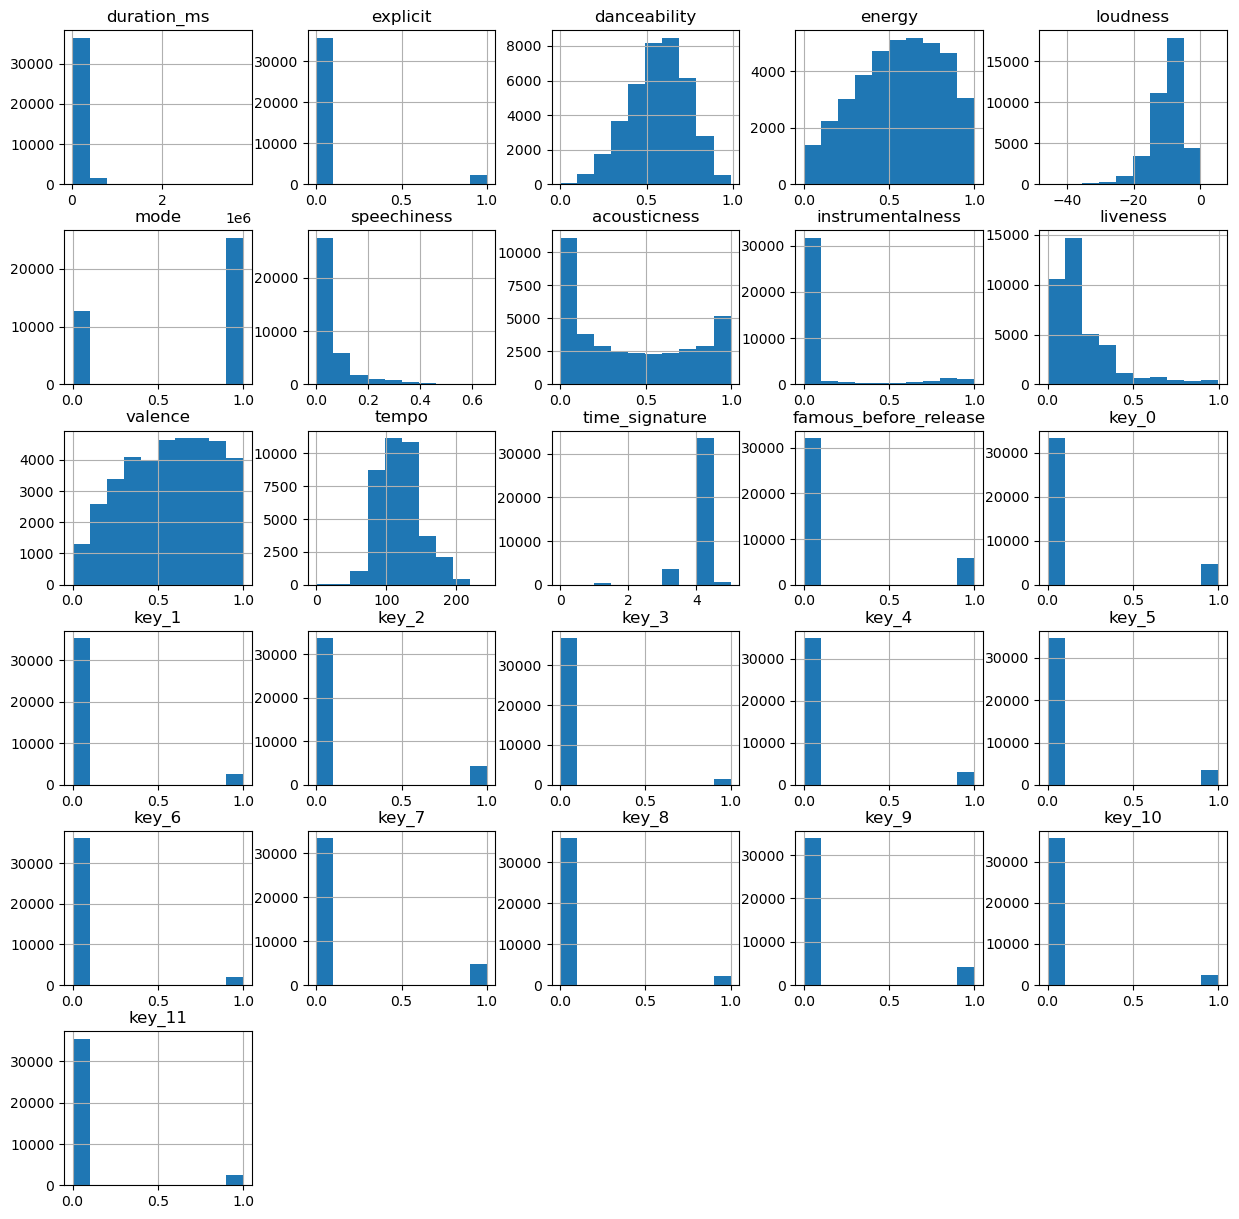

In [34]:
_ = pd.DataFrame.hist(data=hit_song_X, figsize=[15,15])

### Checking correlation so that we can drop features to prevent dimensionality curse

<Axes: >

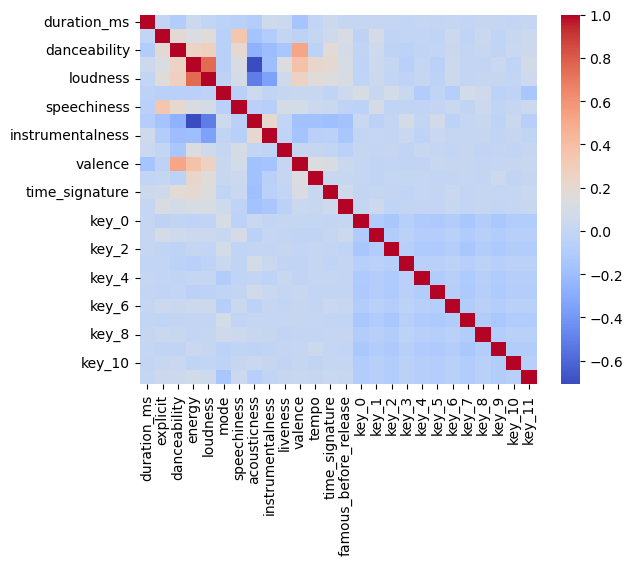

In [35]:
correlation_matrix = hit_song_X.corr()
import seaborn as sns

sns.heatmap(correlation_matrix, cmap="coolwarm")

In [36]:
corr_matrix = correlation_matrix[correlation_matrix != 1.0].dropna(axis=0, how='all').dropna(axis=1, how='all')
corr_pairs = corr_matrix.unstack()

# Sort the correlation pairs by their absolute value in descending order
sorted_pairs = corr_pairs.abs().sort_values(ascending=False)
sorted_pairs

energy        loudness        0.758633
loudness      energy          0.758633
acousticness  energy          0.709078
energy        acousticness    0.709078
valence       danceability    0.522386
                                ...   
key_7         key_7                NaN
key_8         key_8                NaN
key_9         key_9                NaN
key_10        key_10               NaN
key_11        key_11               NaN
Length: 676, dtype: float64

## Applying models

In [37]:
import numpy as np
from scipy import stats
from sklearn.discriminant_analysis import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


scaler = StandardScaler()
rkf = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=2023)


In [38]:
models = []

In [39]:
# Testing adding artists again
# hit_song_X = pd.concat([hit_song_X, artist_dummies], axis=1)
# hit_song_X
hit_song_X.columns

Index(['duration_ms', 'explicit', 'danceability', 'energy', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'famous_before_release', 'key_0',
       'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8',
       'key_9', 'key_10', 'key_11'],
      dtype='object')

In [40]:
zR = DummyClassifier()

steps_zR = [('scaler', scaler), ('estimator', zR)]
pipeline_zR = Pipeline(steps_zR)
scores_zR = cross_val_score(pipeline_zR, hit_song_X, hit_song_y, cv=rkf, scoring='accuracy')
mean_zR = scores_zR.mean()
std_zR = scores_zR.std()
# inf_zR, sup_zR = stats.norm.interval(0.95, loc=mean_zR, 
#                                scale=std_zR/np.sqrt(len(scores_zR)))

print('zR')
print(f'Mean Accuracy: {mean_zR:.2f} Standard Deviation: {std_zR:.2f}')

zR
Mean Accuracy: 0.80 Standard Deviation: 0.00


In [41]:
hit_song_train_df['hit'].value_counts()

0    30470
1     7618
Name: hit, dtype: int64

### Logistic Regression

In [42]:
# import logistic regression
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression()

steps_lr = [('scaler', scaler), ('estimator', lr)]
pipeline_lr = Pipeline(steps_lr)
grid_lr = {'estimator__C': [0.01, 0.1, 1, 10, 100]}
gs_lr = GridSearchCV(estimator=pipeline_lr, param_grid = grid_lr, 
                  scoring='accuracy', cv = 4)

gs_lr.fit(hit_song_X, hit_song_y)
best_model_lr = gs_lr.best_estimator_

models.append((best_model_lr, 'Logistic Regression'))



### Gaussian Naive Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB


gnb = GaussianNB()
steps_gnb = [('scaler', scaler), ('estimator', gnb)]
pipeline_gnb = Pipeline(steps_gnb)

pipeline_gnb.fit(hit_song_X, hit_song_y)

models.append((pipeline_gnb, 'Gaussian Naive Bayes'))


### KNN

In [44]:
# Faça o mesmo para knn
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

steps_knn = [('scaler', scaler), ('estimator', knn)]
pipeline_knn = Pipeline(steps_knn)
grid_knn = {'estimator__n_neighbors': [1, 3, 5, 7, 9, 11, 13]}
gs_knn = GridSearchCV(estimator=pipeline_knn, param_grid = grid_knn,
                    scoring='accuracy', cv = 4)

gs_knn.fit(hit_song_X, hit_song_y)
best_model_knn = gs_knn.best_estimator_

models.append((best_model_knn, 'KNN'))

### Random Forest

In [45]:
# Apply the same code in logistic regression for random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
steps_rf = [('scaler', scaler), ('estimator', rf)]
pipeline_rf = Pipeline(steps_rf)
grid_rf = {'estimator__n_estimators': [10, 50, 100, 200], 'estimator__max_depth': [10, 100, 1000]}
gs_rf = GridSearchCV(estimator=pipeline_rf, param_grid = grid_rf,
                    scoring='accuracy', cv = 4)

gs_rf.fit(hit_song_X, hit_song_y)
best_model_rf = gs_rf.best_estimator_

models.append((best_model_rf, 'Random Forest'))

In [46]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

def evaluate_models(models, X_test, y_test):
    results = []
    for model, name in models:
        test_predictions = model.predict(X_test)
        test_accuracy = accuracy_score(y_test, test_predictions)
        test_recall = recall_score(y_test, test_predictions)
        test_precision = precision_score(y_test, test_predictions)
        test_f1 = f1_score(y_test, test_predictions)
        results.append({
            'model': name,
            'accuracy': test_accuracy,
            'recall': test_recall,
            'precision': test_precision,
            'f1': test_f1
        })

        # Plot confusion matrix
        cm = confusion_matrix(y_test, test_predictions)
        plt.figure(figsize=(5, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion matrix for {name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

    return pd.DataFrame(results), test_predictions

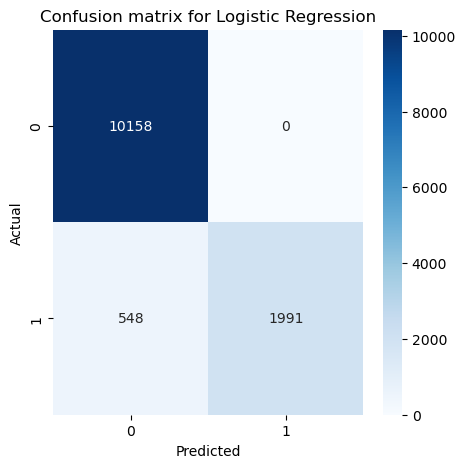

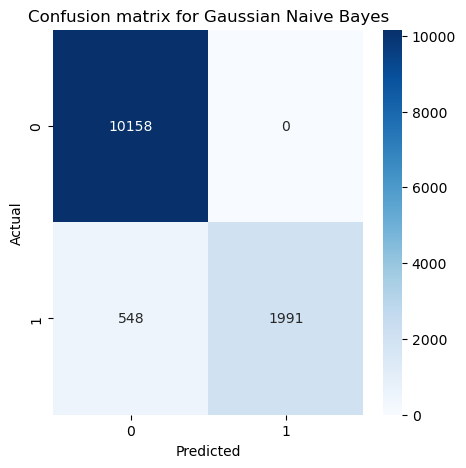

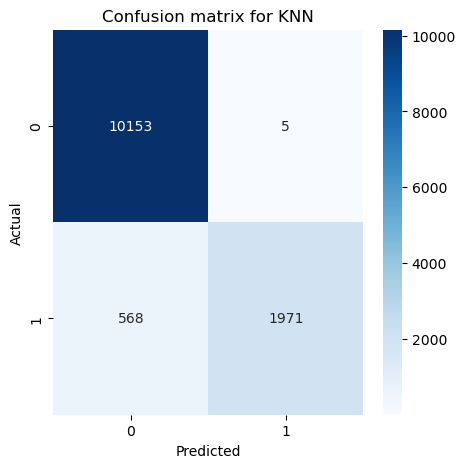

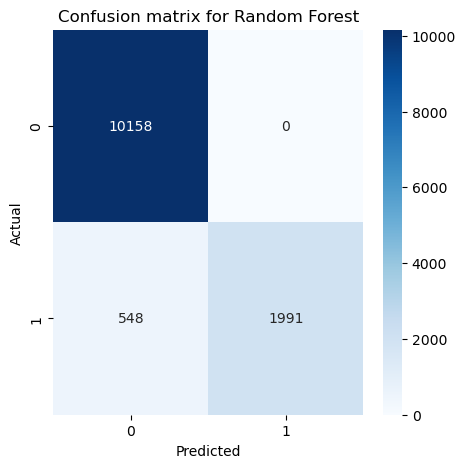

,model,accuracy,recall,precision,f1
0,Logistic Regression,0.956840,0.784167,1.00000,0.879029
1,Gaussian Naive Bayes,0.956840,0.784167,1.00000,0.879029
2,KNN,0.954871,0.776290,0.99747,0.873090
3,Random Forest,0.956840,0.784167,1.00000,0.879029


In [47]:
results, predictions = evaluate_models(models, hit_song_test_df.drop('hit', axis=1), hit_song_test_df['hit'])
results

In [49]:
hit_song_test_df['predicted'] = predictions
incorrect_predictions = hit_song_test_df[hit_song_test_df['hit'] != hit_song_test_df['predicted']]
incorrect_predictions

,duration_ms,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,predicted
96,131200,0,0.522,0.901,-8.559,1,0.0479,0.53500,0.000009,0.1760,...,0,1,0,0,0,0,0,0,0,0
7267,213933,0,0.524,0.816,-3.490,0,0.0308,0.00044,0.000000,0.0777,...,0,0,0,0,0,0,0,0,1,0
327,174293,0,0.608,0.594,-11.860,1,0.0435,0.32000,0.000048,0.1290,...,0,0,0,0,0,0,0,0,0,0
1141,184800,0,0.486,0.701,-10.530,1,0.0348,0.85200,0.746000,0.1080,...,0,0,0,0,1,0,0,0,0,0
2991,154227,0,0.578,0.777,-9.268,1,0.0428,0.31300,0.000026,0.1310,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917,242960,1,0.678,0.795,-9.313,0,0.0822,0.00781,0.000000,0.1560,...,0,0,1,0,0,0,0,0,0,0
3309,170547,0,0.564,0.575,-10.658,1,0.0322,0.04020,0.000000,0.0741,...,0,0,0,0,0,0,0,0,1,0
3549,249640,0,0.547,0.390,-14.038,0,0.0302,0.22300,0.000025,0.4460,...,0,1,0,0,0,0,0,0,0,0
5815,396067,0,0.559,0.878,-9.865,0,0.0367,0.01050,0.004030,0.0947,...,0,0,0,0,0,0,1,0,0,0


         duration_ms    explicit  danceability      energy    loudness  \
count     548.000000  548.000000     548.00000  548.000000  548.000000   
mean   233394.012774    0.135036       0.62229    0.645854   -8.614637   
std     64805.436610    0.342075       0.15245    0.191267    3.604831   
min    109413.000000    0.000000       0.00000    0.055100  -24.140000   
25%    192946.500000    0.000000       0.51700    0.522750  -10.982750   
50%    227033.500000    0.000000       0.62750    0.666500   -8.058500   
75%    261307.000000    0.000000       0.73400    0.794250   -5.925500   
max    527240.000000    1.000000       0.95300    0.991000    0.333000   

             mode  speechiness  acousticness  instrumentalness    liveness  \
count  548.000000   548.000000    548.000000        548.000000  548.000000   
mean     0.686131     0.076852      0.227582          0.038944    0.187410   
std      0.464488     0.079387      0.260308          0.147058    0.153456   
min      0.000000    

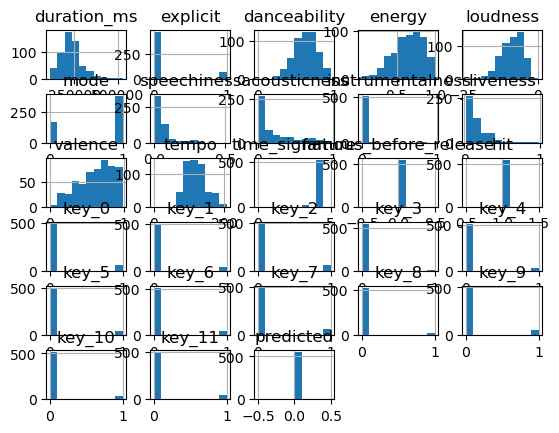

In [51]:
# Descriptive statistics
print(incorrect_predictions.describe())

# Correlation matrix
print(incorrect_predictions.corr())

# Histograms for all numerical columns
incorrect_predictions.hist()

# Bar plots for categorical columns
for column in incorrect_predictions.select_dtypes(include=['object', 'category']):
    incorrect_predictions[column].value_counts().plot(kind='bar')
    plt.title(column)
    plt.show()

# Class imbalance
print(incorrect_predictions['hit'].value_counts())


###